## Summer Olympics Data Analysis Assignment

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv("summer.csv")

In [97]:
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


## 1. In how many cities Summer Olympics is held so far?

In [98]:
data["City"].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [6]:
len(data["City"].unique())

22

## Ans1. 22 cities

## 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [100]:
medals = pd.get_dummies(data["Medal"])  
data = pd.concat([data , medals], axis = 1 )
        

In [101]:
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Bronze,Gold,Silver
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,0,1,0
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,0,0,1
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,1,0,0
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,0,1,0
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,0,0,1


In [102]:
df = pd.DataFrame({"Sport":data["Sport"],"Gold":data["Gold"]})

In [92]:
df.groupby("Sport").sum()["Gold"].sort_values(ascending = False).head()

Sport
Aquatics      1421.0
Athletics     1215.0
Rowing         890.0
Gymnastics     820.0
Fencing        552.0
Name: Gold, dtype: float64

<AxesSubplot:title={'center':'Top 5 Sports with most no. of Gold Medals'}, xlabel='Sport', ylabel='Gold Medals'>

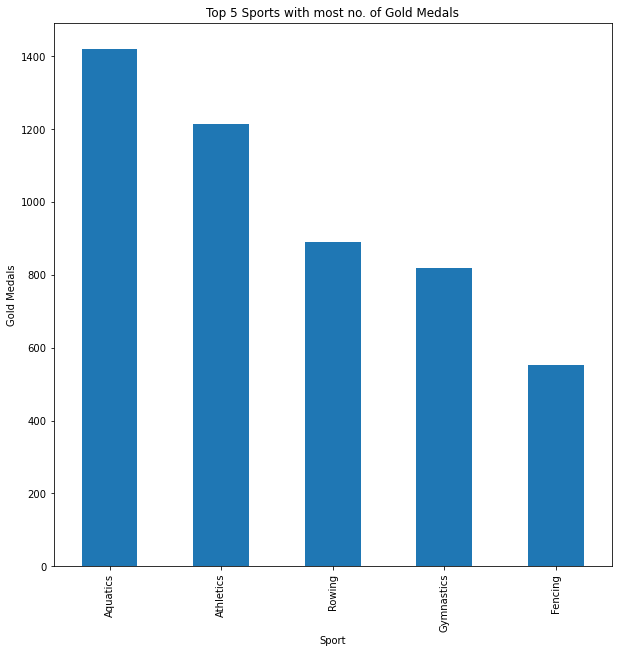

In [103]:
q_2 = df.groupby("Sport").sum()["Gold"].sort_values(ascending = False).head()
q_2.plot(kind = "bar" , figsize = (10,10), ylabel = "Gold Medals" , title = "Top 5 Sports with most no. of Gold Medals")
    

## 3. Which sport is having most number of medals so far? (Top 5)

In [49]:
q_3 = data.groupby("Sport").count()["Medal"].sort_values(ascending = False).head()
q_3

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

<AxesSubplot:title={'center':'Top 5 Sports with most no. of Medals'}, xlabel='Sport', ylabel='Total Medals'>

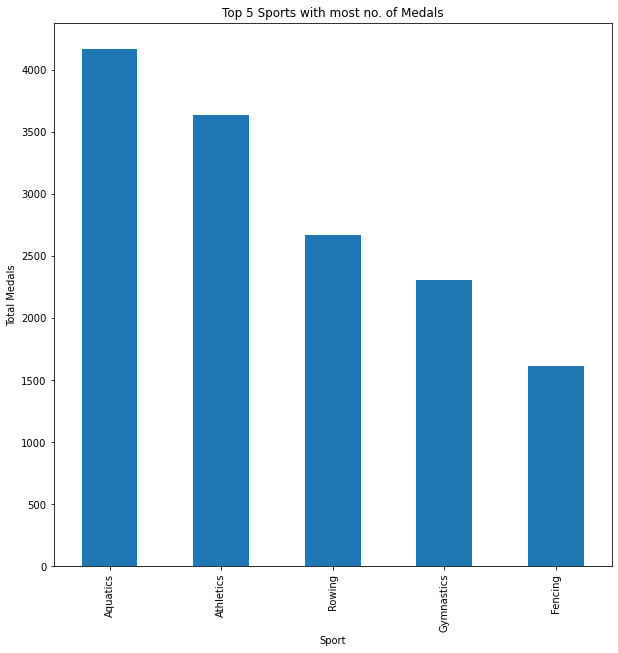

In [56]:
q_3.plot(kind="bar",figsize =(10,10),xlabel ="Sport", ylabel = "Total Medals" , title = "Top 5 Sports with most no. of Medals")

## 4. Which player has won most number of medals? (Top 5)

In [46]:
q_4 = data.groupby("Athlete").count()["Medal"].sort_values(ascending = False).head()
q_4

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
ONO, Takashi            13
Name: Medal, dtype: int64

<AxesSubplot:title={'center':'Top 5 Players with most no. of Medals'}, xlabel='Athlete', ylabel='Total Medals'>

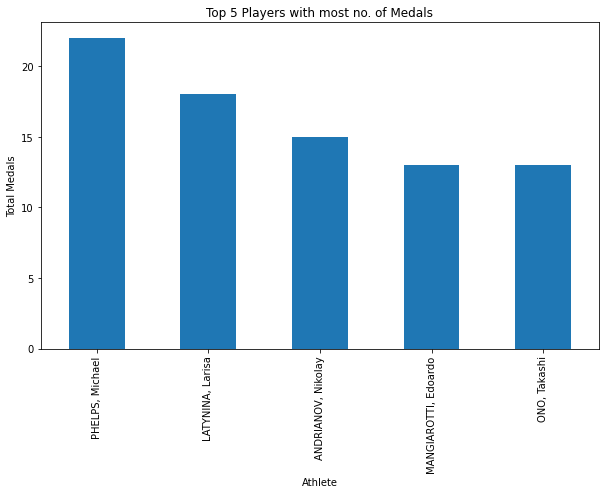

In [47]:
q_4.plot(kind="bar",figsize =(10,6),xlabel ="Athlete", ylabel = "Total Medals" , title = "Top 5 Players with most no. of Medals")

## 5. Which player has won most number Gold Medals of medals? (Top 5)

In [58]:
df_2 = pd.DataFrame({"Player":data["Athlete"], "Gold":data["Gold"]})
df_2.head()

,Player,Gold
0,"HAJOS, Alfred",1
1,"HERSCHMANN, Otto",0
2,"DRIVAS, Dimitrios",0
3,"MALOKINIS, Ioannis",1
4,"CHASAPIS, Spiridon",0


In [56]:
q_5 = df_2.groupby("Player").sum()["Gold"].sort_values(ascending = False).head()
q_5

Player
PHELPS, Michael     18
NURMI, Paavo         9
LATYNINA, Larisa     9
SPITZ, Mark          9
LEWIS, Carl          9
Name: Gold, dtype: uint8

<AxesSubplot:title={'center':'Top 5 Players with Max no. of go'}, xlabel='Player', ylabel='No. of Gold Medals'>

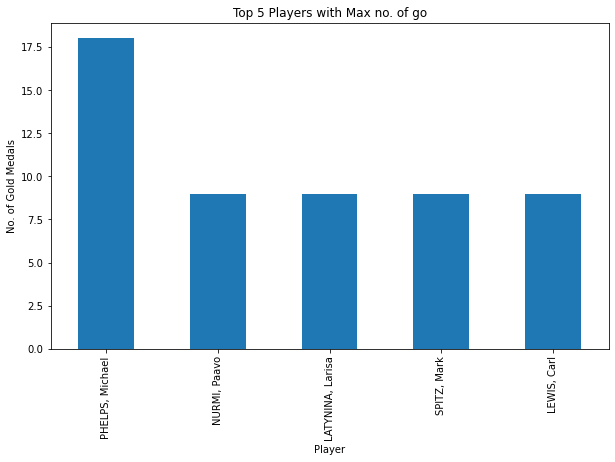

In [57]:
q_5.plot(kind = "bar", figsize = (10,6), ylabel ="No. of Gold Medals", title = "Top 5 Players with Max no. of go")

## 6. In which year India won first Gold Medal in Summer Olympics ?

In [17]:
 q_6 = data[(data["Country"] == "IND")]

In [21]:
q_ = q_6[(q_6["Medal"] == "Gold")]
q_.sort_values(by = "Year").head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Bronze,Gold,Silver
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold,0,1,0
5526,1928,Amsterdam,Hockey,Hockey,"YUSUF, Sayed Mohamed",IND,Men,Hockey,Gold,0,1,0
5525,1928,Amsterdam,Hockey,Hockey,"SINGH, Jaipal",IND,Men,Hockey,Gold,0,1,0
5524,1928,Amsterdam,Hockey,Hockey,"SHAUKAT, Ali",IND,Men,Hockey,Gold,0,1,0
5523,1928,Amsterdam,Hockey,Hockey,"SEAMAN, Frederic S.",IND,Men,Hockey,Gold,0,1,0


# Hence in above data frame we can see in year 1928 India won its fist Gold Medal

## 7. Which event is most popular in terms on number of players? (Top 5)

In [40]:
q_7 = data.groupby("Event").count()["Athlete"].sort_values(ascending = False).head()

<AxesSubplot:title={'center':'Most Popular Event in terms of Players'}, xlabel='Event', ylabel='No. of times played'>

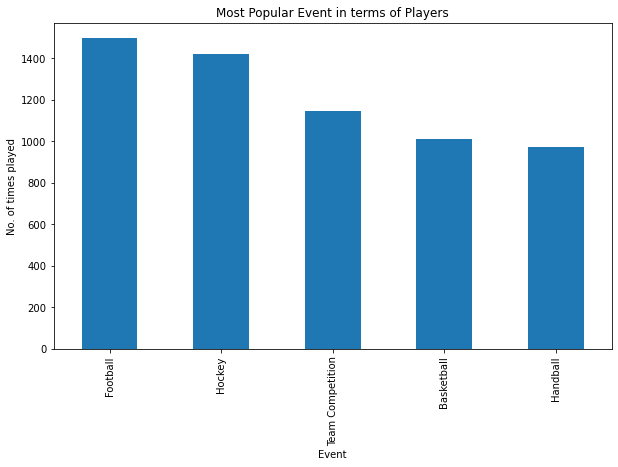

In [44]:
q_7.plot(kind = "bar", ylabel = "No. of times played" , title = "Most Popular Event in terms of Players" , figsize = (10,6))

## 8. Which sport is having most female Gold Medalists? (Top 5)

In [65]:
q_8 = data[(data["Gender"] == "Women")]

In [67]:
result = q_7[(q_7["Gold"] == 1)]

In [80]:
final = result.groupby("Sport").count()["Gender"].sort_values(ascending = False).head()
final

Sport
Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'Top 5 Sports which have most Female Gold Medalists'}, xlabel='Sport', ylabel='No. of Female Gold Medalist'>

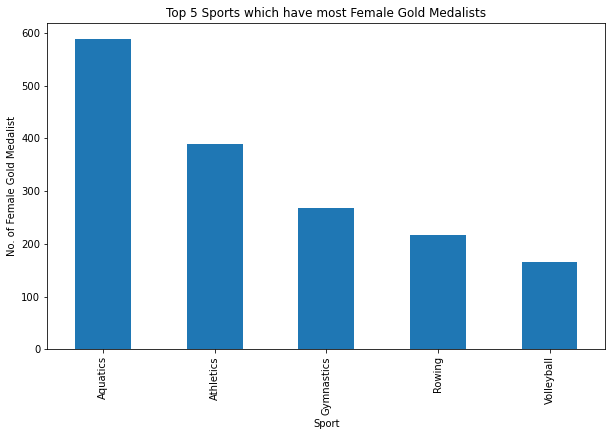

In [79]:
final.plot(kind = "bar", figsize = (10,6) , title ="Top 5 Sports which have most Female Gold Medalists" , ylabel = "No. of Female Gold Medalist")